In [ ]:
# CB: Need to think about this more.  How do two parties share a tripartite state?  
# CB: Can teleportation occur in a one-to-many relationship?

In [1]:
from qiskit import *
import numpy as np

In [2]:
# CB: Initialize Quantum Register.  1 for Alice's qubit, 3 for GHZ entangled state.  4 qubits total.
# CB: THINK: How do they share the entangled state?
q_register = qiskit.QuantumRegister(5)

In [3]:
q_register

QuantumRegister(5, 'q0')

In [4]:
# CB: Initialize two separate Classical Registers.
c_register_1 = qiskit.ClassicalRegister(1)
c_register_2 = qiskit.ClassicalRegister(1)

In [5]:
c_register_1

ClassicalRegister(1, 'c0')

In [6]:
c_register_2

ClassicalRegister(1, 'c1')

In [7]:
# CB: Create teleportation circuit.
GHZ_teleport = qiskit.QuantumCircuit(q_register, c_register_1, c_register_2)

In [8]:
# CB: Initialize shared qubits.
zero = [1,0]
for i in GHZ_teleport.qubits[1:4]:
    GHZ_teleport.initialize(zero, i)

In [12]:
# CB: Initialize Alice's qubit to \ket{\Psi}.
GHZ_teleport.initialize([1/np.sqrt(2), 1j/np.sqrt(2)], 0)

In [13]:
# CB: Construct GHZ as shown here:
# https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
GHZ_teleport.h(1)
GHZ_teleport.cnot(1,2)
GHZ_teleport.cnot(1,3)

In [14]:
# CB: Look at circuit.
GHZ_teleport.draw()

┌──────────────────────────────┐                              
q0_0: ┤ initialize(0.70711,0.70711j) ├──────────────────────────────
      └─────┬─────────────────┬──────┘┌───┐          ┌───┐          
q0_1: ──────┤ initialize(1,0) ├───────┤ H ├──■────■──┤ H ├──■────■──
            ├─────────────────┤       └───┘┌─┴─┐  │  └───┘┌─┴─┐  │  
q0_2: ──────┤ initialize(1,0) ├────────────┤ X ├──┼───────┤ X ├──┼──
            └─────────────────┘            └───┘┌─┴─┐     └───┘┌─┴─┐
q0_3: ──────────────────────────────────────────┤ X ├──────────┤ X ├
                                                └───┘          └───┘
q0_4: ──────────────────────────────────────────────────────────────
                                                                    
c0: 1/══════════════════════════════════════════════════════════════
                                                                    
c1: 1/══════════════════════════════════════════════════════════════

In [15]:
# CB: Initialize simulator.
backend = qiskit.Aer.get_backend('statevector_simulator')

In [16]:
# CB: Program.
q_program = qiskit.execute(GHZ_teleport, backend)

In [17]:
output = q_program.result()

In [18]:
output.get_statevector()

array([ 3.53553391e-01+0.00000000e+00j,  0.00000000e+00+3.53553391e-01j,
       -3.53553391e-01+4.32978028e-17j, -4.32978028e-17-3.53553391e-01j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        3.53553391e-01-4.32978028e-17j,  4.32978028e-17+3.53553391e-01j,
        3.53553391e-01+0.00000000e+00j,  0.00000000e+00+3.53553391e-01j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000

In [19]:
out_state = output.get_statevector()

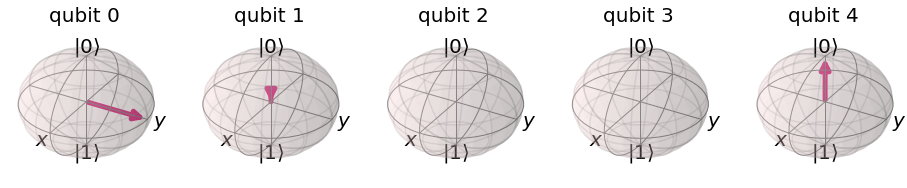

In [20]:
qiskit.visualization.state_visualization.plot_bloch_multivector(out_state)

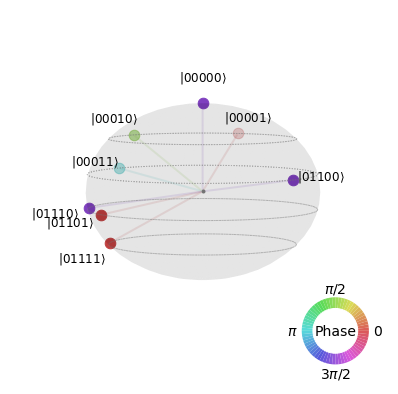

In [21]:
qiskit.visualization.state_visualization.plot_state_qsphere(out_state)

In [22]:
q_object = qiskit.assemble(GHZ_teleport)